In [2]:
import numpy as np
import pandas as pd

In [8]:
np.random.seed(42)

In [10]:
employee_ids = [f"EMP_{i:03d}" for i in range(1,31)]
dates = pd.date_range("2025-07-01",periods = 30, freq = "D")

In [17]:
data={
    "Date": np.tile(dates,len(employee_ids)),
    "Employee_ID":np.repeat(employee_ids, len(dates)),
    "Working_Hours":np.random.uniform(4, 10, size=len(dates)* len(employee_ids))
}

In [19]:
df=pd.DataFrame(data)

In [21]:
df.to_csv("employee_working_hours.csv", index = False)

In [23]:
df_csv = pd.read_csv("employee_working_hours.csv")

In [27]:
print(df_csv.head())
print(df_csv.describe())
print(df_csv["Employee_ID"].nunique())

         Date Employee_ID  Working_Hours
0  2025-07-01     EMP_001       6.247241
1  2025-07-02     EMP_001       9.704286
2  2025-07-03     EMP_001       8.391964
3  2025-07-04     EMP_001       7.591951
4  2025-07-05     EMP_001       4.936112
       Working_Hours
count     900.000000
mean        6.954250
std         1.762121
min         4.027792
25%         5.383714
50%         7.011134
75%         8.486632
max         9.998306
30


In [29]:
total_hours = df_csv.groupby("Employee_ID")["Working_Hours"].mean()

In [33]:
threshold_low = 5
threshold_high = 9
df_csv["Low_Hour_Flag"] = df_csv["Working_Hours"] < threshold_low
df_csv["High_Hour_Flag"] = df_csv["Working_Hours"] > threshold_high

print(df_csv[df_csv["Low_Hour_Flag"] | df_csv["High_Hour_Flag"]].head())

         Date Employee_ID  Working_Hours  Low_Hour_Flag  High_Hour_Flag
1  2025-07-02     EMP_001       9.704286          False            True
4  2025-07-05     EMP_001       4.936112           True           False
5  2025-07-06     EMP_001       4.935967           True           False
6  2025-07-07     EMP_001       4.348502           True           False
7  2025-07-08     EMP_001       9.197057          False            True


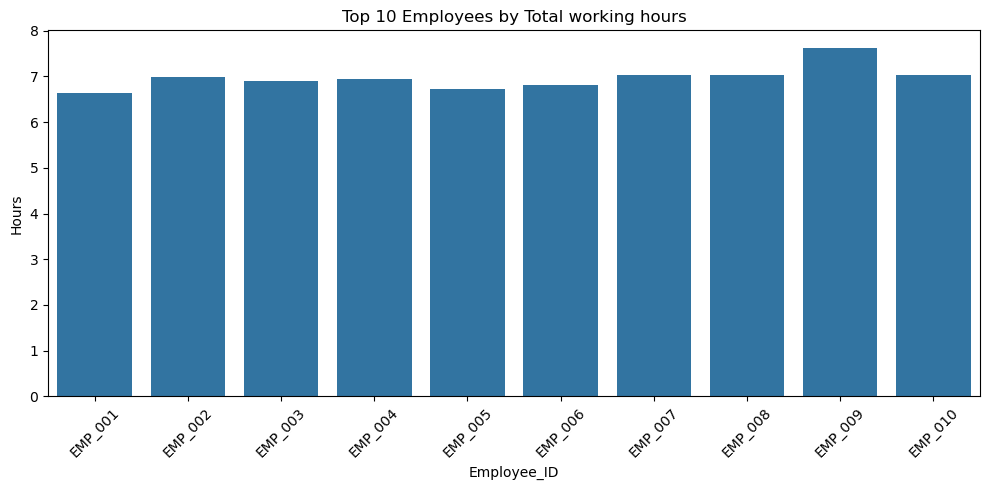

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
top10=total_hours.head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top10.index, y=top10.values)
plt.xticks(rotation=45)
plt.title("Top 10 Employees by Total working hours")
plt.ylabel("Hours")
plt.tight_layout()
plt.show()